# Lab 3
# Parametric classification
# ---------------------------------------------------

<h2>Table of contents </h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction</li>
    <li> Simple logistic regression  </li>
    <li> Multivariable logistic regression </li>
    <li> Logistic regression with regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Assume that you want to design a parametric classification model on a set of observation, where each observation is described in terms of a set of variables. Without knowing anything else about the data set, provide a reasoned justification:

(a) Explain in your own words what is the main difference between supervised learning methods and unsupervised learning methods.  Give an example of application of each type of method. Briefly describe the input and output variables you would consider in each example.

b) Explain in your own words the main difference between soft and hard output of a learning model. Indicate which of the methods presented in theory provide a soft output and which provide a hard output.

c) Explain the concept of overfitting and generalization. If you wish, you may support your answer with a diagram or drawing. Explain in your own words how you could make the designed model generalize well.



For the development of this first practice we will analyze the "Pima Indian Diabetes" database already preprocessed, where the rows of the file correspond to the observations and the columns to the variables.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross-validation will be considered.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Load the dataset (already preprocessed)
data = pd.read_csv("pima_indian_diabetes.csv") 

# Define the input and the output
data_input = data.drop(['Outcome'], axis=1) 
data_output = data['Outcome']

In [3]:
data_input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
# We define the training set (70% of the observations) and test set (30% of the observations).
# We use a fixed value of Random state to obtain always the same results.
# For more details, see the following link: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html
X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 42)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


#### Define the figure of merit, for example, accuracy, sensitivity, specificity, ROC-AUC

In [7]:
accuracy=[]
sensitivity=[]
specificty=[]
auc=[]

## 2.  Logistic regression


(a) Design a logistic regression model using the training and test subsets described above. Clearly indicate what the desired output is.

b) Comment on the confusion matrix as well as the results obtained in terms of at least two figure of merit.

c) Indicate if the figure of merit obtained in the test set change after normalizing the variables.

d) Justify which features are more relevant in this case.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# Logist regressioin
regressor = LogisticRegression()

# Train the model using X_train
regressor = regressor.fit(np.array(X_train['Age']).reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coefficients
print(regressor.coef_)

# Predicted values in the test set
y_pred = regressor.predict(np.array(X_test['Age']).reshape(-1,1))

y_prob_pred=regressor.predict_proba(np.array(X_test['Age']).reshape(-1,1))

print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')



[-2.32124178]
[[0.05043821]]
Y_pred: [0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
y_prob_pred: [[0.53802611 0.46197389]
 [0.77937697 0.22062303]
 [0.77937697 0.22062303]
 [0.64710605 0.35289395]
 [0.45000048 0.54999952]
 [0.38868104 0.61131896]
 [0.77058213 0.22941787]
 [0.52546807 0.47453193]
 [0.61183402 0.38816598]
 [0.27743075 0.72256925]
 [0.57535002 0.42464998]
 [0.33069334 0.66930666]
 [0.7023542  0.2976458 ]
 [0.53802611 0.46197389]
 [0.77058213 0.22941787]
 [0.71278973 0.28721027]
 [0.71278973 0.28721027]
 [0.7522642  0.2477358 ]
 [0.62374304 0.37625696]
 [0.

In [9]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy
Accuracy=accuracy_score(Y_test, y_pred)
print(f'Accuracy: {Accuracy}')

target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(Y_test, y_pred, target_names=target_names))
              
#Sensibility
Sensibility=recall_score(Y_test, y_pred)
print(f'Sensibility: {Sensibility}')




[[130  21]
 [ 67  13]]
tn: 130, fp:21, fn:67, tp:13
Accuracy: 0.6190476190476191
              precision    recall  f1-score   support

Non-diabetic       0.66      0.86      0.75       151
    Diabetic       0.38      0.16      0.23        80

    accuracy                           0.62       231
   macro avg       0.52      0.51      0.49       231
weighted avg       0.56      0.62      0.57       231

Sensibility: 0.1625


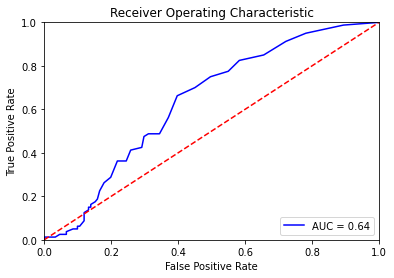

In [10]:
# Compute the AUC and the ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_prob_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [11]:
# Normalize
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
scaler=StandardScaler()
scalerfit =  scaler.fit(X_train)
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)


## 3. Multivariable Logistic Regression 



In [12]:
# Normalize

# Logistic regression
regressor = LogisticRegression()

# Train the model using the training data
regressor_lrm = regressor.fit(X_train_norm, Y_train)

# Show the intercept
print(regressor_lrm.intercept_)

# Show the coefficients
print(regressor_lrm.coef_)

# Compute the predicted value in the test set
y_pred_lrm = regressor_lrm.predict(X_test_norm)

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_lrm)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrm).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy 
Accuracy=accuracy_score(Y_test, y_pred_lrm)
print(f'Accuracy: {Accuracy}')

target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(Y_test, y_pred_lrm, target_names=target_names))
              
#Sensibility
Sensibility=recall_score(Y_test, y_pred_lrm)
print(f'Sensibility: {Sensibility}')

[-0.87964347]
[[ 0.18823163  1.13335776 -0.18631388 -0.02422067 -0.10468258  0.81150478
   0.14358094  0.41370604]]
[[120  31]
 [ 30  50]]
tn: 120, fp:31, fn:30, tp:50
Accuracy: 0.7359307359307359
              precision    recall  f1-score   support

Non-diabetic       0.80      0.79      0.80       151
    Diabetic       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Sensibility: 0.625


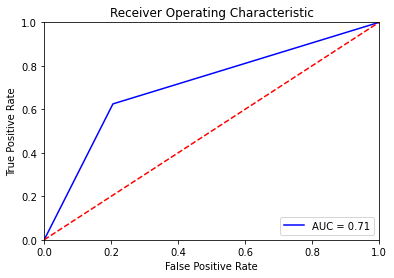

In [13]:
# Compute the AUC and the ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lrm)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
# Logistic regression
regressor = LogisticRegression()

# Train the model using the training data
regressor_lrnn = regressor.fit(X_train, Y_train)

# Show the intercept
print(regressor_lrnn.intercept_)

# Show the coefficients
print(regressor_lrnn.coef_)

# Compute the predicted values for the test set
y_pred_lrnn = regressor_lrnn.predict(X_test)

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_lrnn)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrnn).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy
Accuracy=accuracy_score(Y_test, y_pred_lrnn)
print(f'Accuracy: {Accuracy}')

target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(Y_test, y_pred_lrnn, target_names=target_names))
              
#Sensibility
Sensibility=recall_score(Y_test, y_pred_lrnn)
print(f'Sensibility: {Sensibility}')

[-9.39075367]
[[ 0.05654413  0.03558456 -0.01087782 -0.00179055 -0.00098901  0.1076117
   0.52393907  0.03582565]]
[[121  30]
 [ 30  50]]
tn: 121, fp:30, fn:30, tp:50
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

Non-diabetic       0.80      0.80      0.80       151
    Diabetic       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Sensibility: 0.625


/Users/gabriela/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


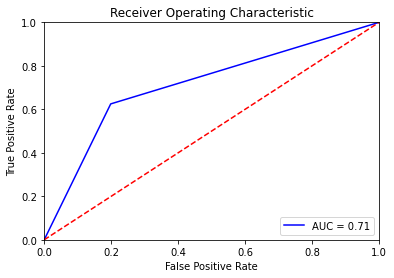

In [15]:
# Compute the AUC and the ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lrnn)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

You can explore what results are obtained when: (1) you normalize the variables; (2) you discard some features based on the value of their coefficients; (3) you use other approaches such as stats.

## 4. Logistic regression with regularization

a) Indicate whether the performance obtained in the test set changes when Ridge or Lasso regression is considered.

b) Justify which characteristics are more relevant for these models.

In [16]:
# Logistic regression
from sklearn.model_selection import GridSearchCV


# C values and penalty
parameters = grid={"C":np.linspace(1e-4,10,100), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,parameters,cv=5)
logreg_cv.fit(X_train_norm,Y_train)



# Grid search
log_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

# Train using X_train
log_regression.fit(X_train_norm, Y_train)

# We show the best value of the parameter and the score
print(log_regression.best_params_)
print(log_regression.best_score_)


# The predicted output is obtained
y_pred_reg = log_regression.predict(X_test_norm)



{'C': 0.3031272727272727, 'penalty': 'l1'}
0.7801661474558671


In [17]:
#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_reg)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_reg).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_reg)
print(f'Accuracy: {Accuracy}')

target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(Y_test, y_pred_reg, target_names=target_names))
              
#Sensibility
Sensibility=recall_score(Y_test, y_pred_reg)
print(f'Sensibility: {Sensibility}')

[[121  30]
 [ 33  47]]
tn: 121, fp:30, fn:33, tp:47
Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

Non-diabetic       0.79      0.80      0.79       151
    Diabetic       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231

Sensibility: 0.5875


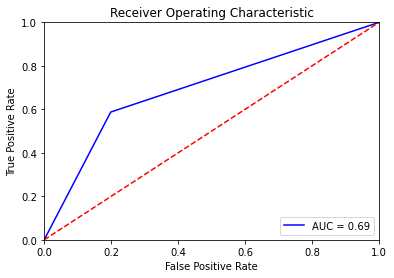

In [18]:
# Compute the AUC and the ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_reg)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso()

logreg=LogisticRegression(solver='liblinear', penalty='l1')

# Alpha values
parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

# Grid search 
lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

# Train using the Xtrain
lasso_train=lasso_regression.fit(X_train_norm, Y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

# Compute the predicted output
y_pred_lasso = lasso_regression.predict(X_test_norm)



 

{'C': 1}
0.7745932848736586


In [20]:
#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_lasso)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_lasso)
print(f'Accuracy: {Accuracy}')

target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(Y_test, y_pred_lasso, target_names=target_names))
              
#Sensibility
Sensibility=recall_score(Y_test, y_pred_lasso)
print(f'Sensibility: {Sensibility}')

[[120  31]
 [ 32  48]]
tn: 120, fp:31, fn:32, tp:48
Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

Non-diabetic       0.79      0.79      0.79       151
    Diabetic       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Sensibility: 0.6


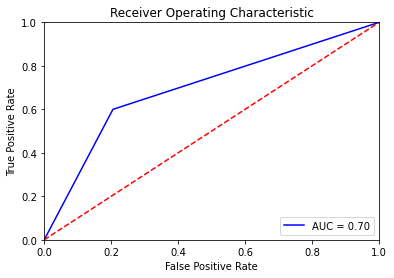

In [21]:
# Compute the AUC and the ROC

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Comparison of the results obtained with the different models


Include in a table the performances of the test set obtained according to different figures of merit:

In view of the results obtained, answer, if possible, the following questions:

(a) Justify with which scheme of those analyzed you obtain better performances in the test set.

b) Justify the influence of the regularization parameter on the results obtained.

c) Justify reasonably if the fact of making a single partition of the cases in the training and test sets can influence the results obtained.

d) Starting from the original data, perform a new partition of the cases in the training and test sets. Select one of the classifiers analyzed (indicate the classifier chosen) and obtain again the confusion matrix and the evaluation measures. Comment on the results obtained.
